In [1]:
from google.colab import drive
drive.mount("/content/gdrive")
!ls "/content/gdrive/MyDrive/data"

Mounted at /content/gdrive
 face.csv	        faceLabel.csv
 faceData	        model4emotionClassfier
 faceData2D	        model4multiClassfier
 faceData2DWithNumber  'model4multiClassfier(exceptAge)'
 face_Dataset	        model4raceClassfier
 faceDataset	        model4sexClassfier
 faceDataset2	        model4sexClassfierWithoutValid
 faceDataWithNumber     rawdata
 faceDR		        rawdata.zip
 faceDS		        vgg_face_dag.pth


In [2]:
!pip install keras_vggface
!pip install keras_applications
# !pip install keras==2.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 6.2 MB/s eta 0:00:00


In [3]:
import matplotlib.pyplot as plt  # show image
import numpy as np
import pandas as pd
import sys
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
# Only work in TPU
# print("Tensorflow version " + tf.__version__)

# try:
#   tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
#   print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
# except ValueError:
#   raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

# tf.config.experimental_connect_to_cluster(tpu)
# tf.tpu.experimental.initialize_tpu_system(tpu)
# tpu_strategy = tf.distribute.TPUStrategy(tpu)

In [5]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
dtype = np.uint8
shape = (128,128)

# file_path /content/gdrive/My Drive/data/rawdata/xxxx
pre_img_path="/content/gdrive/MyDrive/data/rawdata/"
pre_path="/content/gdrive/MyDrive/data/"

# Read the data from the binary file
# data = np.fromfile(file_path, dtype=dtype).reshape(shape)

In [7]:
!unzip "/content/gdrive/MyDrive/data/rawdata.zip" -d /content/sample_data/rawdataFolder

Archive:  /content/gdrive/MyDrive/data/rawdata.zip
   creating: /content/sample_data/rawdataFolder/rawdata/
  inflating: /content/sample_data/rawdataFolder/rawdata/1223  
  inflating: /content/sample_data/rawdataFolder/rawdata/1224  
  inflating: /content/sample_data/rawdataFolder/rawdata/1225  
  inflating: /content/sample_data/rawdataFolder/rawdata/1226  
  inflating: /content/sample_data/rawdataFolder/rawdata/1227  
  inflating: /content/sample_data/rawdataFolder/rawdata/1229  
  inflating: /content/sample_data/rawdataFolder/rawdata/1230  
  inflating: /content/sample_data/rawdataFolder/rawdata/1231  
  inflating: /content/sample_data/rawdataFolder/rawdata/1233  
  inflating: /content/sample_data/rawdataFolder/rawdata/1234  
  inflating: /content/sample_data/rawdataFolder/rawdata/1235  
  inflating: /content/sample_data/rawdataFolder/rawdata/1236  
  inflating: /content/sample_data/rawdataFolder/rawdata/1237  
  inflating: /content/sample_data/rawdataFolder/rawdata/1238  
  inflatin

In [8]:
pre_img_path="/content/sample_data/rawdataFolder/"

In [9]:


# def readImage(path):
#     with open(path,'rb') as f:
#         # print(path)
#         data = np.fromfile(f, dtype=np.uint8)
#         image_array=np.reshape(data,(128,128))
#         return image_array
#         # return data
    
face=pd.read_csv(pre_path+"faceLabel.csv")

# read image part
new=True
for  i in face["number"]:
    # number=1223
    if new==True:
        path=pre_img_path+f"rawdata/{i}"
        new_element = np.fromfile(path, dtype=dtype).reshape(shape)
        dataset = tf.data.Dataset.from_tensor_slices([new_element])
        new=False
    else:
        path=pre_img_path+f"rawdata/{i}"
        data = np.fromfile(path, dtype=dtype).reshape(shape)
        new_element = tf.data.Dataset.from_tensor_slices([data])
        dataset = dataset.concatenate(new_element)
    # if i>1230:
    #     break
# print(faceData.shape)
# faceData.to_pickle("faceData2D") 
# dataset=tf.data.Dataset.load(pre_path+"faceDataset")
print(dataset)


# print(faceData)

# plt.imshow(np.reshape(faceData.iloc[0,1],(128,128)), cmap='cividis', vmin=0, vmax=256)
# plt.show()

<_ConcatenateDataset element_spec=TensorSpec(shape=(128, 128), dtype=tf.uint8, name=None)>


In [10]:
face.head()

,number,sex,age,race,emotion,extra,sex_label,age_adult,age_child,age_senior,age_teen,race_asian,race_black,race_hispanic,race_other,race_white,emotion_funny,emotion_serious,emotion_smiling
0,1223,male,child,white,smiling,NaN,1,0,1,0,0,0,0,0,0,1,0,0,1
1,1224,male,child,white,serious,NaN,1,0,1,0,0,0,0,0,0,1,0,1,0
2,1225,male,child,white,smiling,NaN,1,0,1,0,0,0,0,0,0,1,0,0,1
3,1226,male,child,white,smiling,NaN,1,0,1,0,0,0,0,0,0,1,0,0,1
4,1227,male,child,white,serious,NaN,1,0,1,0,0,0,0,0,0,1,0,1,0


In [11]:
# tf.data.experimental.save(dataset, pre_path+"faceDataset")
# tf.data.Dataset.save(dataset, pre_path+"faceDataset")

In [12]:
# num_elements = tf.data.experimental.cardinality(dataset).numpy()

# print(f"The concatenated dataset has {num_elements} elements.")

In [13]:
def convert_image(image):
    image = tf.expand_dims(image, axis=0)
    image = tf.expand_dims(image, axis=-1)
    return tf.tile(image, [1, 1, 1, 3])
dataset_ = dataset.map(convert_image)

In [14]:
print(dataset_)

<_MapDataset element_spec=TensorSpec(shape=(1, 128, 128, 3), dtype=tf.uint8, name=None)>


In [15]:
num_elements = tf.data.experimental.cardinality(dataset_).numpy()
print(f"The dataset has {num_elements} elements.")

The dataset has 3993 elements.


In [16]:
# def add_batch_dimension(image):
#     return tf.expand_dims(image, axis=0)
# dataset_ = dataset_.map(convert_image)

In [17]:
# convert dataframe to tensor
# label_tensor=tf.convert_to_tensor(face["sex_label"].values)
# label_tensor=tf.convert_to_tensor(face[["sex_label","age_adult","age_child","age_senior","age_teen","race_asian","race_black","race_hispanic","race_other","race_white","emotion_funny","emotion_serious","emotion_smiling"]].values)
# label_tensor=tf.convert_to_tensor(face[["race_asian","race_black","race_hispanic","race_other","race_white"]].values)
# label_tensor=tf.convert_to_tensor(face[["emotion_funny","emotion_serious","emotion_smiling"]].values)
label_tensor=tf.convert_to_tensor(face[["age_adult","age_child","age_senior","age_teen"]].values)
# label_tensor=tf.convert_to_tensor(face[["sex_label","race_black","race_hispanic","race_other","race_white","emotion_funny","emotion_serious","emotion_smiling"]].values)

In [18]:
num_out_put=label_tensor.shape[1]
print(label_tensor)

tf.Tensor(
[[0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 ...
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]], shape=(3993, 4), dtype=int64)


In [19]:
label_tensor_=tf.data.Dataset.from_tensor_slices(label_tensor)

In [20]:
label_tensor_=tf.reshape(label_tensor,(num_elements,1,num_out_put))
label_tensor__=tf.data.Dataset.from_tensor_slices(label_tensor_)

In [21]:
# merge label and data
data_=tf.data.Dataset.zip((dataset_,label_tensor__))
# data_=tf.stack([dataset,label_tensor_.take(8)])

In [22]:
# tf.data.experimental.save(data_, pre_path+"face_Dataset")

In [23]:
print(data_)

<_ZipDataset element_spec=(TensorSpec(shape=(1, 128, 128, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(1, 4), dtype=tf.int64, name=None))>


In [24]:
# split train and test sets
# 计算训练集大小（例如，80% 的数据用于训练）
train_size = int(num_elements * 0.8)

# 使用 take 方法获取训练集
ds_train_ = data_.take(train_size)

# 使用 skip 方法获取测试集
ds_valid_ = data_.skip(train_size)

In [25]:
print(ds_valid_)

<_SkipDataset element_spec=(TensorSpec(shape=(1, 128, 128, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(1, 4), dtype=tf.int64, name=None))>


In [26]:
# Data Pipeline
def convert_to_float(image,label ):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

In [27]:
ds_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(1, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(1, 4), dtype=tf.int64, name=None))>

# 1) Define Pretrained Base #

Now that you have a pretrained base to do our feature extraction, decide whether this base should be trainable or not.

The **InceptionV1** model pretrained on ImageNet is available in the [TensorFlow Hub](https://www.tensorflow.org/hub/) repository, but we'll load it from a local copy. Run this cell to load InceptionV1 for your base.

In [28]:
import tensorflow_hub as hub

# from keras_vggface.vggface import VGGFace
# below will occur import error .change "from keras.engine.topology import get_source_inputs" to "from keras.utils.layer_utils import get_source_inputs"

# from tensorflow.keras.applications.inception_v3 import InceptionV3
# # 实例化一个预训练好的InceptionV3模型
# pretrained_base = InceptionV3(weights='imagenet',include_top=False,input_shape=(128, 128, 3))

# pretrained_base = VGGFace(model='vgg16',input_shape=(128,128,3))
# pretrained_base = tf.keras.models.load_model(
#     '/content/gdrive/My Drive/data/vgg_face.pb'
# )
# pretrained_base = hub.KerasLayer("https://tfhub.dev/google/imagenet/inception_resnet_v2/classification/5")
# pretrained_base = hub.KerasLayer("https://tfhub.dev/google/imagenet/inception_v1/classification/5")



In [29]:
# pretrained_base.trainable = True

# 3) Train #

Before training a model in Keras, you need to specify an *optimizer* to perform the gradient descent, a *loss function* to be minimized, and (optionally) any *performance metrics*. The optimization algorithm we'll use for this course is called ["Adam"](https://keras.io/api/optimizers/adam/), which generally performs well regardless of what kind of problem you're trying to solve.

The loss and the metrics, however, need to match the kind of problem you're trying to solve. Our problem is a **binary classification** problem: `Car` coded as 0, and `Truck` coded as 1. Choose an appropriate loss and an appropriate accuracy metric for binary classification.

In [30]:
pretrained_base = hub.KerasLayer("https://tfhub.dev/google/imagenet/inception_v1/classification/5")

In [31]:
from keras import backend as K

def f1_score(y_true, y_pred):
    # Calculate the true positives, false positives, and false negatives
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    false_positives = K.sum(K.round(K.clip(y_pred - y_true, 0, 1)))
    false_negatives = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)))

    # Calculate the precision and recall
    precision = true_positives / (true_positives + false_positives + K.epsilon())
    recall = true_positives / (true_positives + false_negatives + K.epsilon())

    # Calculate the F1 score
    f1_score = 2 * (precision * recall) / (precision + recall + K.epsilon())

    return f1_score

In [40]:
def creat_model():
  import tensorflow_hub as hub
  # from tensorflow.keras.applications.inception_v3 import InceptionV3
  # 实例化一个预训练好的InceptionV3模型
  # pretrained_base = InceptionV3(weights='imagenet',include_top=False,input_shape=(128, 128, 3))
  # pretrained_base = hub.KerasLayer("https://tfhub.dev/google/imagenet/inception_v1/classification/5")
  # pretrained_base.trainable = True
  model_TPU = keras.Sequential([
  pretrained_base,
  layers.Flatten(),
  # layers.Dropout(0.1),
  layers.Dense(36*num_out_put, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(num_out_put, activation='sigmoid'),
])
  model_TPU.compile(
    optimizer="adam",
    loss='binary_crossentropy',
    metrics=['accuracy',f1_score],
)
  return model_TPU
def creat_Mymodel():
  import tensorflow_hub as hub
  model_TPU = keras.Sequential([
  layers.Conv2D(32, (6, 6), activation='relu', input_shape=(128, 128, 3)),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(64, (5, 5), activation='relu', input_shape=(128, 128, 3)),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(128, (4, 4), activation='relu', input_shape=(128, 128, 3)),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
  layers.MaxPooling2D((2,2)),
  layers.Flatten(),
  # layers.Dropout(0.1),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(num_out_put, activation='sigmoid'),
])
  model_TPU.compile(
    optimizer="adam",
    loss='binary_crossentropy',
    metrics=['accuracy',f1_score],
)
  return model_TPU
if "tpu_strategy" in globals():
  with tpu_strategy.scope(): # creating the model in the TPUStrategy scope means we will train the model on the TPU
    # from tensorflow.keras.applications.inception_v3 import InceptionV3
    # pretrained_base_TPU = InceptionV3(weights='imagenet',include_top=False,input_shape=(128, 128, 3))
    # pretrained_base_TPU.trainable = True
    model=creat_model()
else:
  model=creat_Mymodel()

  

In [33]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping



checkpoint = ModelCheckpoint('model-{epoch:02d}.h5', save_weights_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=15,restore_best_weights=True)

In [41]:
history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=200,
    callbacks=[checkpoint,early_stopping]
)

Epoch 1/200
3194/3194 [==============================] - 19s 5ms/step - loss: 0.1544 - accuracy: 0.9173 - f1_score: 0.9043 - val_loss: 0.5766 - val_accuracy: 0.8210 - val_f1_score: 0.8210
Epoch 2/200
3194/3194 [==============================] - 17s 5ms/step - loss: 0.1706 - accuracy: 0.8713 - f1_score: 0.8500 - val_loss: 0.4371 - val_accuracy: 0.8210 - val_f1_score: 0.8210
Epoch 3/200
3194/3194 [==============================] - 16s 5ms/step - loss: 0.2098 - accuracy: 0.8460 - f1_score: 0.8250 - val_loss: 0.3762 - val_accuracy: 0.8210 - val_f1_score: 0.8210
Epoch 4/200
3194/3194 [==============================] - 16s 5ms/step - loss: 0.2208 - accuracy: 0.8300 - f1_score: 0.8155 - val_loss: 0.3779 - val_accuracy: 0.8210 - val_f1_score: 0.8210
Epoch 5/200
3194/3194 [==============================] - 18s 6ms/step - loss: 0.2185 - accuracy: 0.8350 - f1_score: 0.8120 - val_loss: 0.3771 - val_accuracy: 0.8210 - val_f1_score: 0.8210
Epoch 6/200
3194/3194 [==============================] - 16s

In [42]:
# model.build()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)      

Run the cell below to plot the loss and metric curves for this training run.

<Axes: >

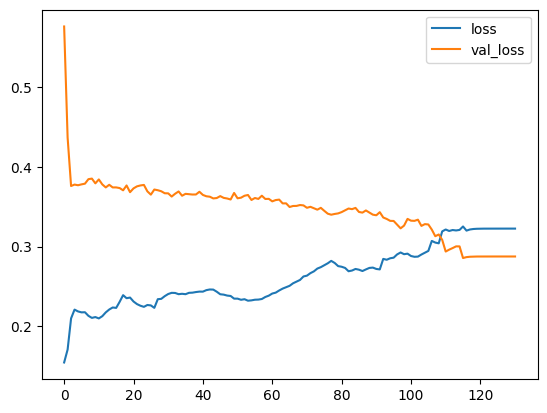

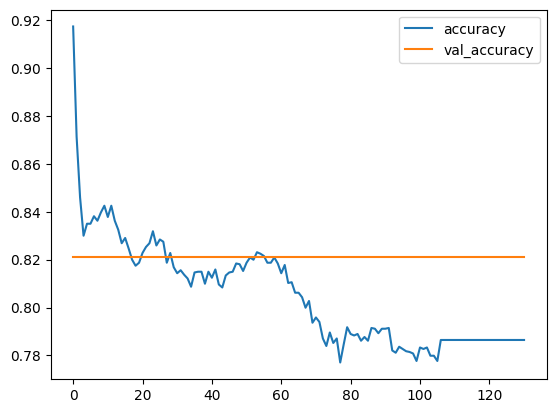

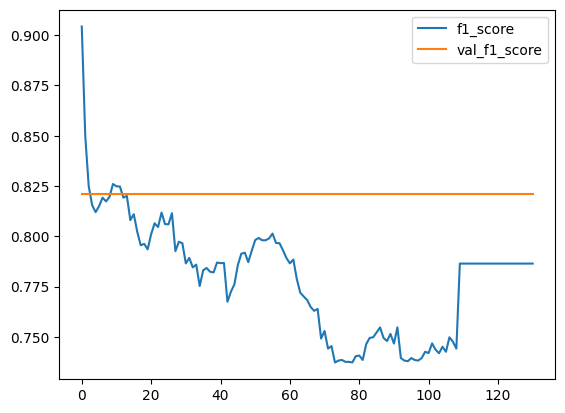

In [45]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()
history_frame.loc[:, ['f1_score','val_f1_score']].plot()

In [ ]:
# model.predict(ds_valid)

In [ ]:
for layer in model.layers:
  if isinstance(layer,layers.Dense):
    print((layer.get_weights()))
    break
    # print(layer)


[array([[-0.10905829,  0.15479478,  0.04024289,  0.1697712 ],
       [ 0.15190673, -0.02834386, -0.01485097, -0.13097598],
       [-0.03438644,  0.05641077,  0.04652322,  0.08255785],
       ...,
       [-0.20414118,  0.21756732,  0.48566937,  0.13635379],
       [-0.17851329,  0.10735644,  0.20392849,  0.05023551],
       [-0.01335084, -0.09754273,  0.00715161, -0.09720302]],
      dtype=float32), array([-0.01808666, -0.04534809, -0.07895924, -0.09444791], dtype=float32)]


In [ ]:
i=0
for e in ds_valid:
  # print(e[1])
  # print(e[0])
  # prediction=model.predict(e[0])
  # print(prediction)
  # print([1 if i>0.5 else 0 for i in l ])
  i+=1
  if i>520:
    print(e[1])
    # print(e[0])
    prediction=model.predict(e[0])
    print(prediction)
    break

tf.Tensor([[1 0 0 0]], shape=(1, 4), dtype=int64)
1/1 [==============================] - 0s 38ms/step
[[9.9999988e-01 4.9826346e-19 1.2862105e-17 9.2132041e-07]]


In [ ]:

print([1 if i>0.5 else 0 for i in prediction[0]])

In [ ]:
# # 定义输入和输出
# inputs = {'input_image': model.input}
# outputs = {'output_scores': model.output}

# 导出模型
# tf.saved_model.save(model, pre_path+"modelTPU4multiClassfier(exceptAge)")

In [ ]:
# model_load=tf.saved_model.load(pre_path+"model4multiClassfier")

In [ ]:
# print(model_load.signatures.keys())

In [ ]:
# model.predict(ds_valid_)

In [ ]:
# for e in ds_valid:
#   print(e[1])
#   # print(e[0])
#   prediction=model_load.signatures['serving_default'](e[0])
#   print(prediction)
#   # print([1 if i>0.5 else 0 for i in l ])
#   break

In [ ]:
# print(prediction['dense_9'].numpy())

In [ ]:
# print([1 if i>0.5 else 0 for i in prediction['dense_9'].numpy()[0]])